Idea for spectrogram error bars

1. For each pixel get the dist that go into thwt ais plotted. 
1. Resample each based on the dist
1. replot
1. repeat and see which are still there

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pymc3 as pm


sns.set(font_scale=1.5)

In [2]:
with pm.Model() as model:
    c_means = pm.Uniform('c_means', 0, 100, shape=5)
    corrections = pm.Normal('corrs', c_means, sd=1, shape=5, observed=[3,4,5,4,3])
    p_means = pm.Uniform('p_means', 0, 100, shape=5)
    p = pm.Poisson('p', p_means, shape=5, observed=[30, 35, 20, 45, 16])
    avg = pm.Deterministic('avg', pm.math.sum(c_means, axis=0) + pm.math.sum(p_means, axis=0)/5)
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_means, c_means]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:12<00:00, 1617.47draws/s]


In [3]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
c_means[0],3.013,0.981,1.083,4.793,0.007,0.005,17991.0,17991.0,17367.0,8356.0,1.0
c_means[1],3.997,0.989,2.127,5.830,0.007,0.005,21108.0,21108.0,20809.0,10844.0,1.0
c_means[2],5.000,1.006,3.148,6.914,0.006,0.005,24783.0,24783.0,24903.0,11266.0,1.0
c_means[3],4.002,1.009,2.122,5.904,0.007,0.005,23110.0,23110.0,23302.0,10057.0,1.0
c_means[4],3.008,0.987,1.142,4.839,0.007,0.005,20088.0,20088.0,19526.0,10649.0,1.0
p_means[0],30.958,5.532,21.147,41.582,0.033,0.024,27546.0,25524.0,27984.0,14584.0,1.0
p_means[1],36.014,5.992,25.148,47.323,0.036,0.027,27775.0,25399.0,28560.0,14025.0,1.0
p_means[2],21.028,4.580,12.783,29.626,0.026,0.020,30479.0,26678.0,31297.0,14131.0,1.0
p_means[3],45.977,6.881,33.130,58.873,0.042,0.031,27470.0,24821.0,28676.0,12313.0,1.0
p_means[4],16.986,4.167,9.177,24.567,0.024,0.018,29977.0,26330.0,30326.0,13785.0,1.0


/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1285ae6d0>,
      dtype=object)

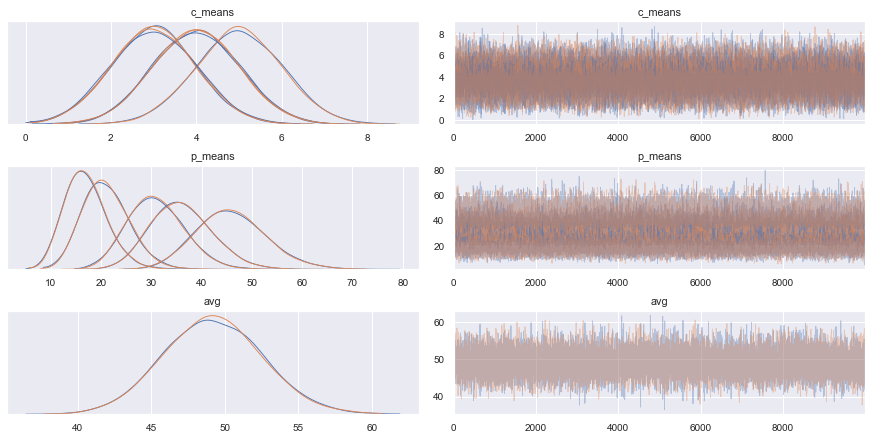

In [4]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a4ebad0>,
      dtype=object)

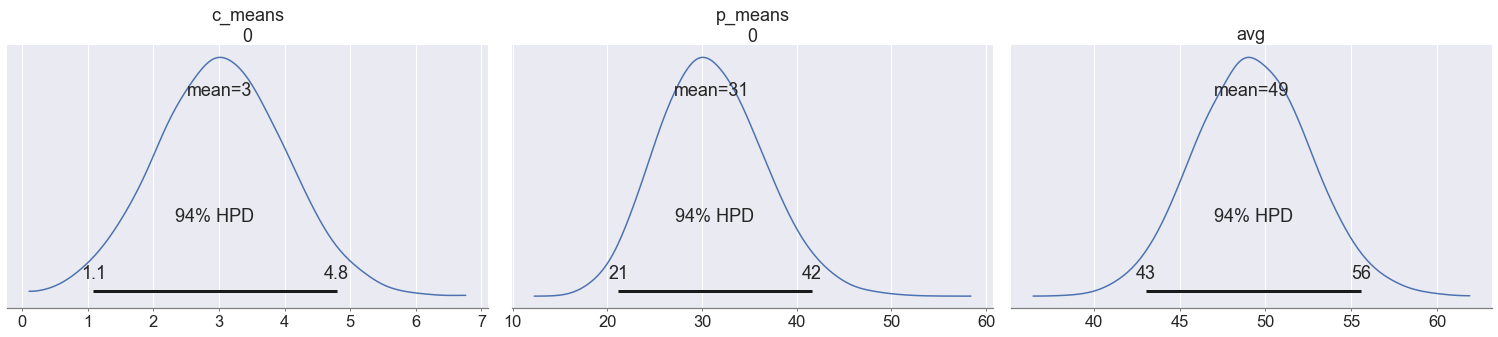

In [5]:
pm.plot_posterior(trace)

In [6]:
print(np.average([30, 35, 20, 45, 16]))

29.2


# Can we do multi-d together?

In [12]:
with pm.Model() as model:
    p_means = pm.Uniform('p_means', 0, 100, shape=(5, 16))  # time, pixel, sector
    p = pm.Poisson('p', p_means, shape=5, observed=np.random.poisson(30, size=(5, 16)))
    avg = pm.Deterministic('avg', pm.math.sum(p_means)/(5*16))
    
    trace = pm.sample(10000)

INFO (theano.gof.compilelock): Refreshing lock /Users/balarsen/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_means]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:11<00:00, 1892.77draws/s]


In [13]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
"p_means[0,0]",31.019,5.606,20.973,41.886,0.029,0.022,36484.0,31995.0,37615.0,13528.0,1.0
"p_means[0,1]",28.996,5.423,18.878,38.954,0.031,0.023,30850.0,27753.0,31984.0,15189.0,1.0
"p_means[0,2]",34.018,5.821,23.702,45.180,0.030,0.023,37132.0,31559.0,39285.0,13392.0,1.0
"p_means[0,3]",30.992,5.596,20.520,41.353,0.032,0.024,31291.0,27784.0,32416.0,13568.0,1.0
"p_means[0,4]",25.959,5.054,17.050,35.843,0.027,0.020,35055.0,30526.0,36394.0,14481.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
"p_means[4,12]",33.979,5.854,23.257,44.853,0.031,0.023,36571.0,32177.0,37791.0,13523.0,1.0
"p_means[4,13]",28.967,5.379,19.189,39.285,0.027,0.021,39670.0,33861.0,40855.0,12167.0,1.0
"p_means[4,14]",30.939,5.483,20.897,41.374,0.028,0.021,37143.0,32625.0,38408.0,14148.0,1.0
"p_means[4,15]",32.014,5.639,21.755,42.671,0.031,0.023,34111.0,29706.0,35870.0,14018.0,1.0


/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133c4d710>,
      dtype=object)

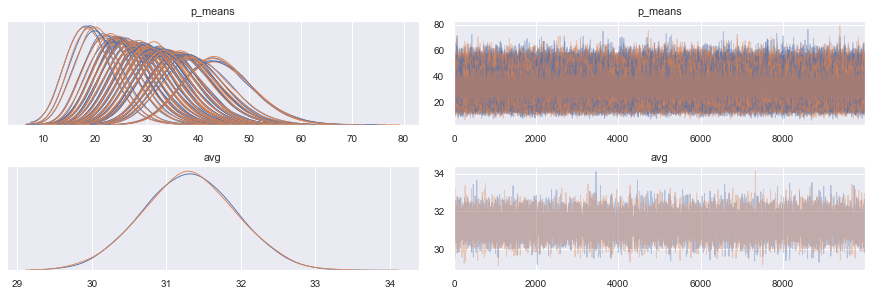

In [14]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128799a50>,
      dtype=object)

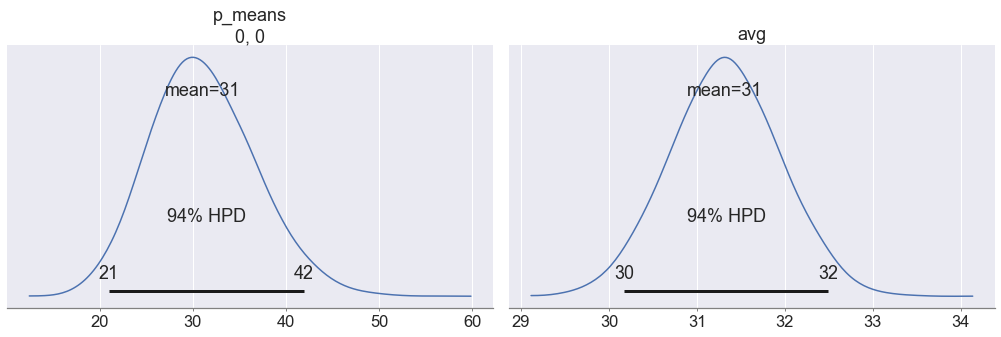

In [15]:
pm.plot_posterior(trace)